In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

!pip install git+https://github.com/quantopian/pyfolio

!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

Requirement already up-to-date: yfinance in /opt/anaconda3/lib/python3.8/site-packages (0.1.55)
  Cloning https://github.com/quantopian/pyfolio to /private/var/folders/ss/7j72qbwj5b388zt286t4pp2w0000gn/T/pip-req-build-q3eb1guh
  Running command git clone -q https://github.com/quantopian/pyfolio /private/var/folders/ss/7j72qbwj5b388zt286t4pp2w0000gn/T/pip-req-build-q3eb1guh


  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75763 sha256=7fcc3f7b9d99745aa146f03db39c1c57ed6a787f4a35d65d6d7c779eda4ab05d
  Stored in directory: /private/var/folders/ss/7j72qbwj5b388zt286t4pp2w0000gn/T/pip-ephem-wheel-cache-q0l269h_/wheels/03/00/1c/647b2b1a87981bb9ce79040685d203386303338628a36992f3
Successfully built pyfolio


/opt/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
## IMPORTANDO DADOS DO YAHOO - CARTEIRA + BENCHMARK .
## IMPORTANTE REPARAR QUE 'PERIOD = 'X' E' O PERIODO DOS DADOS QUE VC BUSCA . 

In [4]:
tickers = [ "F", "GE", "MELI", "^GSPC" ]
dados = web.get_data_yahoo(tickers, period = "2y")["Close"]

[*********************100%***********************]  4 of 4 completed


In [18]:
dados

['F']


,F,GE,MELI,^GSPC
Date,,,,
2019-03-20,8.51,10.22,497.950012,2824.229980
2019-03-21,8.69,10.27,504.480011,2854.879883
2019-03-22,8.54,9.98,497.369995,2800.709961
2019-03-25,8.51,9.88,491.299988,2798.360107
2019-03-26,8.76,10.10,493.899994,2818.459961
...,...,...,...,...
2021-03-15,13.20,13.35,1581.319946,3968.939941
2021-03-16,12.49,13.15,1550.489990,3962.709961
2021-03-17,12.69,13.61,1537.619995,3974.120117


In [6]:
dados.head()

,F,GE,MELI,^GSPC
Date,,,,
2019-03-20,8.51,10.22,497.950012,2824.229980
2019-03-21,8.69,10.27,504.480011,2854.879883
2019-03-22,8.54,9.98,497.369995,2800.709961
2019-03-25,8.51,9.88,491.299988,2798.360107
2019-03-26,8.76,10.10,493.899994,2818.459961


In [7]:
dados.tail()

,F,GE,MELI,^GSPC
Date,,,,
2021-03-15,13.20,13.35,1581.319946,3968.939941
2021-03-16,12.49,13.15,1550.489990,3962.709961
2021-03-17,12.69,13.61,1537.619995,3974.120117
2021-03-18,12.49,13.25,1436.170044,3915.459961
2021-03-19,12.83,13.22,1448.890015,3913.100098


In [8]:
retorno = dados.pct_change()
retorno

,F,GE,MELI,^GSPC
Date,,,,
2019-03-20,NaN,NaN,NaN,NaN
2019-03-21,0.021152,0.004892,0.013114,0.010852
2019-03-22,-0.017261,-0.028238,-0.014094,-0.018975
2019-03-25,-0.003513,-0.010020,-0.012204,-0.000839
2019-03-26,0.029377,0.022267,0.005292,0.007183
...,...,...,...,...
2021-03-15,-0.012715,0.061208,0.020108,0.006492
2021-03-16,-0.053788,-0.014981,-0.019496,-0.001570
2021-03-17,0.016013,0.034981,-0.008301,0.002879


In [9]:
retorno_acumulado = ( 1 + retorno ).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,F,GE,MELI,^GSPC
Date,,,,
2019-03-20,1.000000,1.000000,1.000000,1.000000
2019-03-21,1.021152,1.004892,1.013114,1.010852
2019-03-22,1.003525,0.976517,0.998835,0.991672
2019-03-25,1.000000,0.966732,0.986645,0.990840
2019-03-26,1.029377,0.988258,0.991867,0.997957
...,...,...,...,...
2021-03-15,1.551116,1.306262,3.175660,1.405318
2021-03-16,1.467685,1.286693,3.113746,1.403112
2021-03-17,1.491187,1.331702,3.087900,1.407152


In [10]:
carteira = 10000 * retorno_acumulado.iloc[:, :6]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,F,GE,MELI,^GSPC,saldo,retorno
Date,,,,,,
2019-03-20,10000.000000,10000.000000,10000.000000,10000.000000,40000.000000,NaN
2019-03-21,10211.515096,10048.923864,10131.137637,10108.524810,40500.101408,0.012503
2019-03-22,10035.252329,9765.165637,9988.351901,9916.720594,39705.490462,-0.019620
2019-03-25,10000.000000,9667.318842,9866.451968,9908.400261,39442.171070,-0.006632
2019-03-26,10293.772025,9882.583285,9918.666167,9979.569583,40074.591061,0.016034
...,...,...,...,...,...,...
2021-03-15,15511.162696,13062.622341,31756.600211,14053.175446,74383.560694,0.017374
2021-03-16,14676.850100,12866.926884,31137.462641,14031.116405,72712.356030,-0.022467
2021-03-17,14911.867496,13317.024756,30879.003061,14071.517350,73179.412664,0.006423


Start date,2019-03-20
End date,2021-03-19
Total months,24
,Backtest
Annual return,33.12%
Cumulative returns,77.411%
Annual volatility,34.251%
Sharpe ratio,1.01
Calmar ratio,0.77
Stability,0.46
Max drawdown,-43.291%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,43.29,2020-02-04,2020-03-23,2020-08-03,130
1,16.33,2019-07-24,2019-10-08,2020-01-07,120
2,10.96,2020-08-25,2020-09-23,2020-10-09,34
3,10.74,2021-02-16,2021-03-08,NaT,NaN
4,7.57,2021-01-22,2021-01-27,2021-02-11,15


Stress Events,mean,min,max
New Normal,0.14%,-12.74%,12.15%


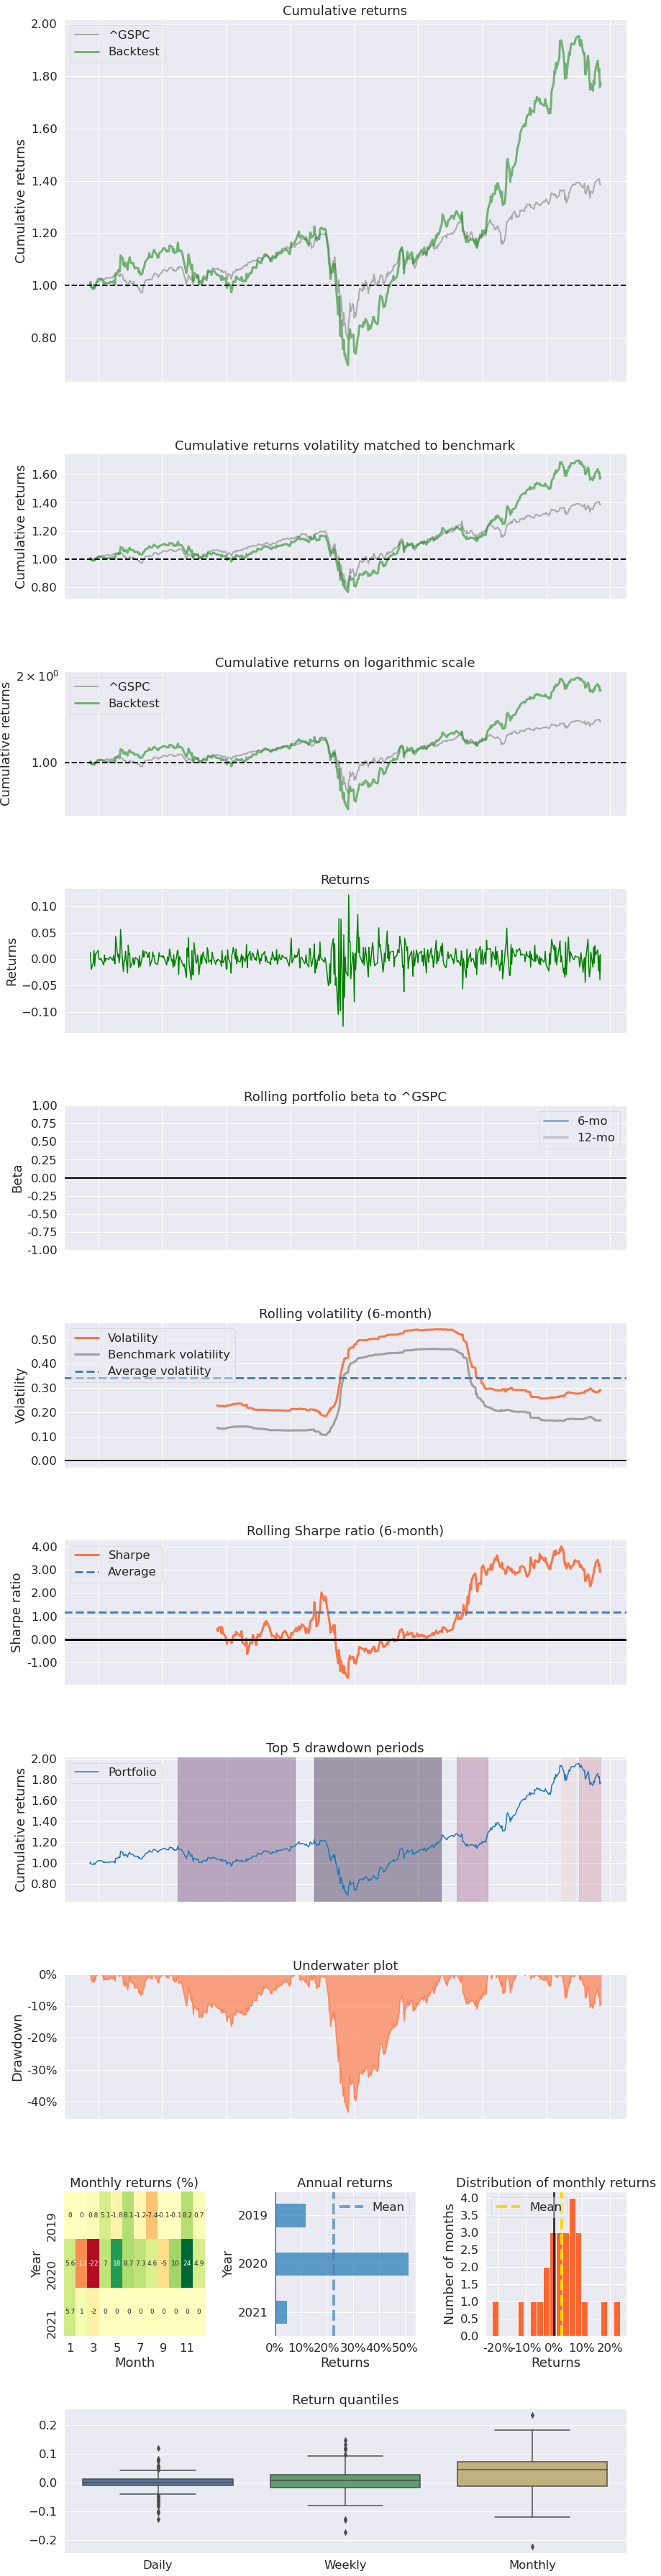

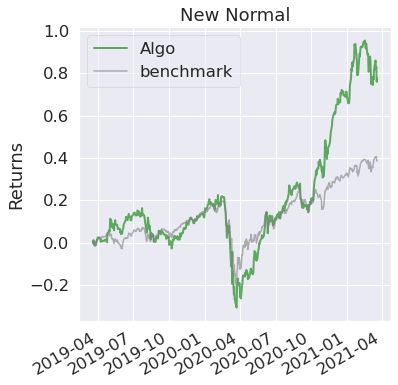

In [11]:
pf.create_full_tear_sheet( carteira["retorno"], benchmark_rets = retorno["^GSPC"] )

In [20]:
tck = [("MELI")]

market_cap=int(web.get_quote_yahoo(tck)['marketCap'])
print(market_cap)

72255709184


In [21]:
tck = [ "F", "MELI", "GE", "BRFS" ]

for i in tck:
    print(i, int(web.get_quote_yahoo(i)['marketCap']))

F 51046592512
MELI 72255709184
GE 115912163328
BRFS 3725133056
